# 1 Qubits Model 

___

In this notebook, a simple 1-dimensional AngularModel is tested for a time window of $\tau > 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qrobot.models import AngularModel

We start by defining an arbirary input sequence:

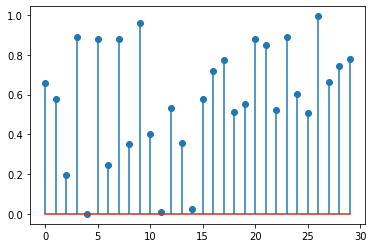

In [2]:
tau = 30

sequence = list()
# Balanced events
for i in range(0, int(tau/2)):
    sequence.append(np.random.randint(0,1000)/1000)
# Unbalanced events
for i in range(int(tau/2), tau):
    sequence.append(np.random.randint(500,1000)/1000)
    
plt.stem(sequence, use_line_collection=True)
plt.show()

We initialize then the model with $n = 1 $ and we encode the whole sequence of $\tau $ events

In [3]:
model = AngularModel(1,tau)

for t in range(0,model.tau):
    model.encode(sequence[t],dim=1)
    
model.print()

     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
q_0: ┤ RY(0.069115) ├┤ RY(0.060319) ├┤ RY(0.020735) ├┤ RY(0.093096) ├»
     └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
c_0: ════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
«q_0: ┤ RY(pi/15000) ├┤ RY(0.092049) ├┤ RY(0.025552) ├┤ RY(0.092153) ├»
«     └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
«c_0: ════════════════════════════════════════════════════════════════»
«                                                                     »
«     ┌──────────────┐┌─────────────┐┌───────────┐┌───────────────┐»
«q_0: ┤ RY(0.036652) ├┤ RY(0.10032) ├┤ RY(pi/75) ├┤ RY(0.0011519) ├»
«     └──────────────┘└─────────────┘└───────────┘└───────────────┘»
«c_0: ═════════════════════════════════════════════════════════════»
«        

Given the input we defined above, the model is in the following state:

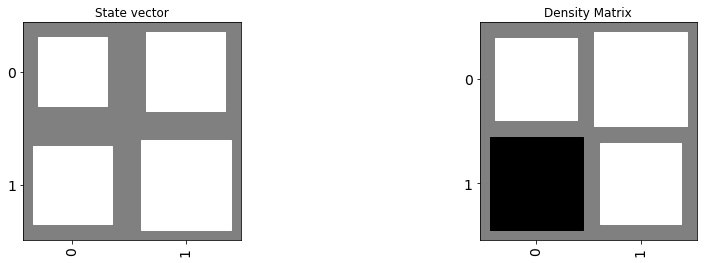

In [4]:
model.plot_state()

**Density matrix** (from [Wikipedia](https://en.wikipedia.org/wiki/Density_matrix)): or a finite-dimensional function space, the most general density operator is of the form

$$\rho =\sum _{j}p_{j}|\psi _{j}\rangle \langle \psi _{j}|$$

where the coefficients $p_{j}$ are non-negative and add up to one, and $|\psi _{j}\rangle \langle \psi _{j}|$ is an outer product written in bra-ket notation. This represents a mixed state, with probability $ p_{j}$ that the system is in the pure state $|\psi _{j}\rangle $

### $-$ Measurement simulation

In [5]:
shots = 1000000
counts = model.measure(shots)

In [6]:
import json
print("Aggregated binary outcomes of the circuit:")
print(json.dumps(counts, sort_keys=True, indent=4))

Aggregated binary outcomes of the circuit:
{
    "0": 369437,
    "1": 630563
}


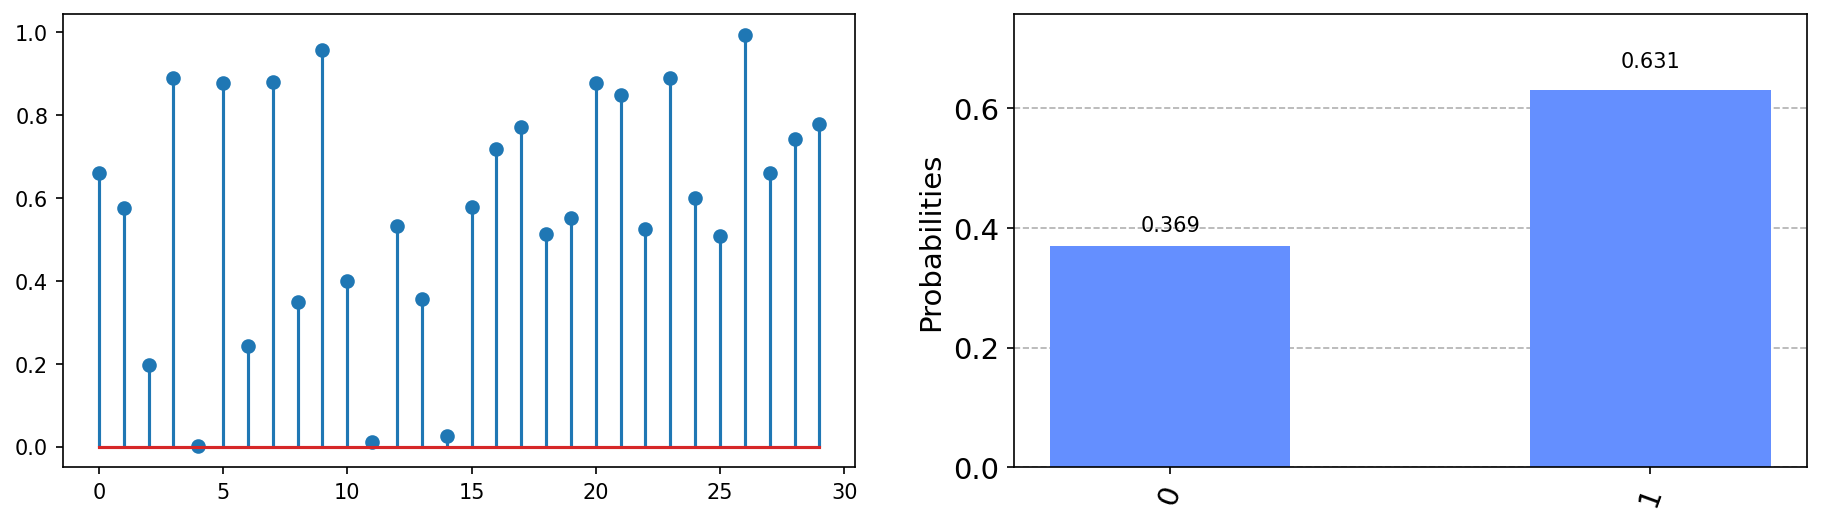

In [7]:
plt.figure(figsize=(15,4), dpi=150)

ax1 = plt.subplot(1,2,1)
ax1.stem(sequence, use_line_collection=True)

ax2 = plt.subplot(1,2,2)
plot_histogram(counts, ax = ax2)

plt.show()